<a href="https://colab.research.google.com/github/peterbb148/Python/blob/master/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install lmfit

     |████████████████████████████████| 307kB 4.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 256kB 44.0MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.2-cp36-none-any.whl size=85264 sha256=c0be6fd6b931e721ac5e0821f43363ccc355282895856a083836011854117363
  Stored in directory: /root/.cache/pip/wheels/d4/5e/db/d9f5987d9f15bf910feb5e0274ac601d5f2161dc78aedfacfa
  Created wheel for asteval: filename=asteval-0.9.22-cp36-none-any.whl size=17403 sha256=d0e8ae115450d274fef75b428fae424976e21c1896419b9377275e7b538c22e6
  Stored in directory: /root/.cache/pip/wheels/2e/d1/89/9c633e0b69853564132ce3011ff53f3e122283b0a2d273f886
Successfully built lmfit asteval


In [4]:
import pandas as pd
import matplotlib as mp
import requests
import json
import csv
from io import StringIO
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel

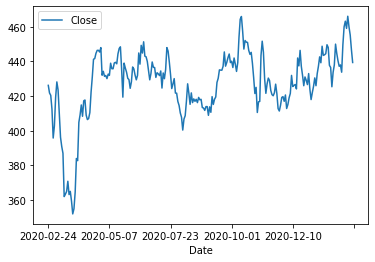

In [6]:
#df = pd.read_csv('AAB.csv', sep=';', decimal=',')
#df_t = df.T
#print(df_t)
url = 'https://query1.finance.yahoo.com/v7/finance/download/{}'
stock = "NOVO-B.CO"
params = {
    'range' : '1y',
    'interval' : '1d',
    'events' : 'history'
}
response = requests.get(url.format(stock), params=params)
file = StringIO(response.text)
df = pd.read_csv(file, sep=',', decimal='.')
# df
df.plot(x ='Date', y='Close', kind = 'line')

In [11]:
# Fit curve to data
close_px = df['Close']
mavg = close_px.rolling(window=100).mean()
mavg

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
245    434.9760
246    435.1820
247    435.3125
248    435.3375
249    435.3380
Name: Close, Length: 250, dtype: float64

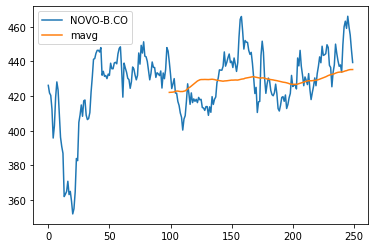

In [12]:
close_px.plot(label=stock)
mavg.plot(label='mavg')
plt.legend()